## Description:
A cooking website sells cooking equipment. They want to improve their product page. The product page has a rail with media (images or videos). Up until now, they have had a horizontal rail, a UX designer suggested having a vertical one. As a data analyst in the company, you suggested doing an AB test. You now have the results of the test and need to advise the company on whether they should ship the feature (vertical media rail) or not.

Importing the required libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

## Importing the dataset and checking the data:
getting a general idea of the data and see if cleaning is needed:

In [2]:
df = pd.read_csv('..\\data\\assessment_da25.csv')

In [3]:
df.columns

Index(['Variant', 'Number of page views', 'GMV (in $)',
       'Number of add to cart', 'Clicks on media', 'Time on Page (sec)',
       'user_id'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=2000, step=1)

In [5]:
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [6]:
df.tail()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
1995,B,3,0.00,1,0,1,1995
1996,B,3,0.00,1,2,31,1996
1997,B,3,0.00,2,0,3,1997
1998,B,4,87.08,2,1,11,1998
1999,B,7,0.00,5,6,35,1999


In [7]:
df.sample()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
808,A,5,0.0,4,3,18,808


In [8]:
df.sample(5)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
1223,B,9,63.02,1,4,4,1223
1979,B,6,0.00,2,1,47,1979
831,A,6,0.00,0,1,12,831
182,A,3,0.00,4,1,18,182
1372,B,8,0.00,5,2,27,1372


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


so there is no missing value, and the data types dont need to be changed! now we can check for duplicates:

In [10]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

no duplicate rows, now let's check the descriptive statistics for numerical columns for each variant separately to compare metrics such as mean, median(50%), standard deviation, and range directly between these groups

In [11]:
df[df['Variant']=='A'].describe()

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.985000,7.689990,1.884000,1.495000,20.543000,499.500000
std,2.236465,26.794816,1.297778,1.230239,20.596076,288.819436
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,6.000000,249.750000
50%,5.000000,0.000000,2.000000,1.000000,13.000000,499.500000
75%,6.000000,0.000000,3.000000,2.000000,29.000000,749.250000
max,12.000000,152.610000,8.000000,6.000000,143.000000,999.000000


In [12]:
df[df['Variant']=='B'].describe()

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.317000,9.289530,2.469000,1.324000,20.047000,1499.500000
std,2.417096,28.879687,1.660662,1.180855,19.319784,288.819436
min,0.000000,0.000000,0.000000,0.000000,1.000000,1000.000000
25%,3.000000,0.000000,1.000000,0.000000,7.000000,1249.750000
50%,5.000000,0.000000,2.000000,1.000000,14.000000,1499.500000
75%,7.000000,0.000000,3.000000,2.000000,28.000000,1749.250000
max,15.000000,141.270000,10.000000,7.000000,132.000000,1999.000000


## Comparison of primary metric distribution between two variants:
I chose the GMV as the primary metric. Since it directly reflects revenue impact, which is a crucial business outcome.

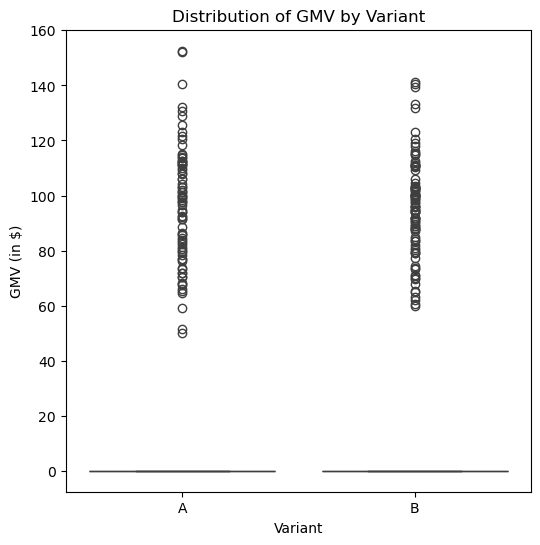

In [13]:
plt.figure(figsize=[6, 6])
sns.boxplot(x='Variant', y='GMV (in $)', data=df)
plt.title('Distribution of GMV by Variant')
plt.show()

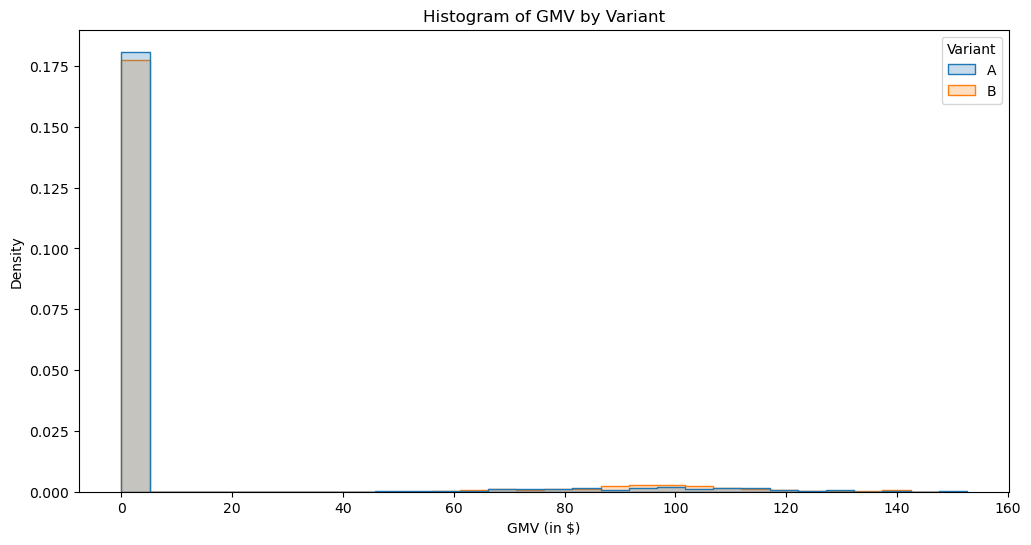

In [14]:
plt.figure(figsize=[12, 6])
sns.histplot(df, x='GMV (in $)', hue='Variant', element='step', stat='density', common_norm=False, bins=30)
plt.title('Histogram of GMV by Variant')
plt.xlabel('GMV (in $)')
plt.ylabel('Density')
plt.show()

## Secondary metrics:
I picked 3 secondary metrics:

1.Add to Cart Rate: 
The number of add-to-cart actions divided by the number of page views.
It shows user interest and the effectiveness of product appeal.

2.Time on Page

3.Click-through Rate (CTR) for Media: The total number of clicks on media divided by the number of page views. This metric would help understand how engaging the media elements are to the users.

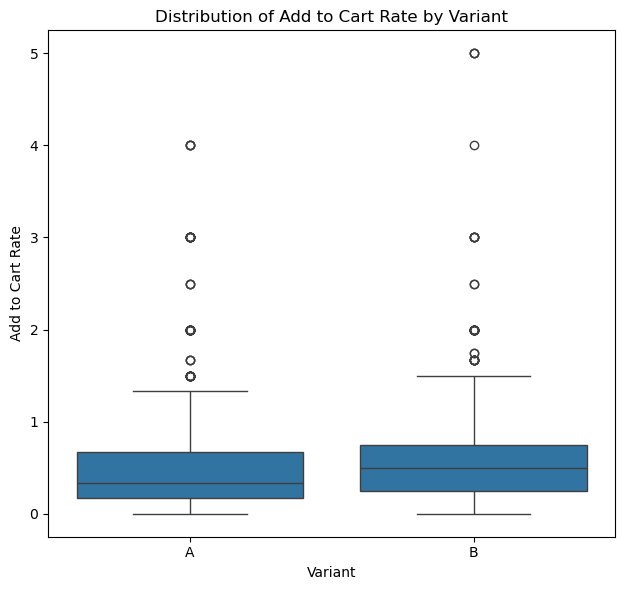

In [15]:
df['Add to Cart Rate'] = df['Number of add to cart'] / df['Number of page views']
 
plt.figure(figsize=[18, 6])

# Plotting Add to Cart Rate
plt.subplot(1, 3, 1)
sns.boxplot(x='Variant', y='Add to Cart Rate', data=df)
plt.title('Distribution of Add to Cart Rate by Variant')

plt.tight_layout()
plt.show()

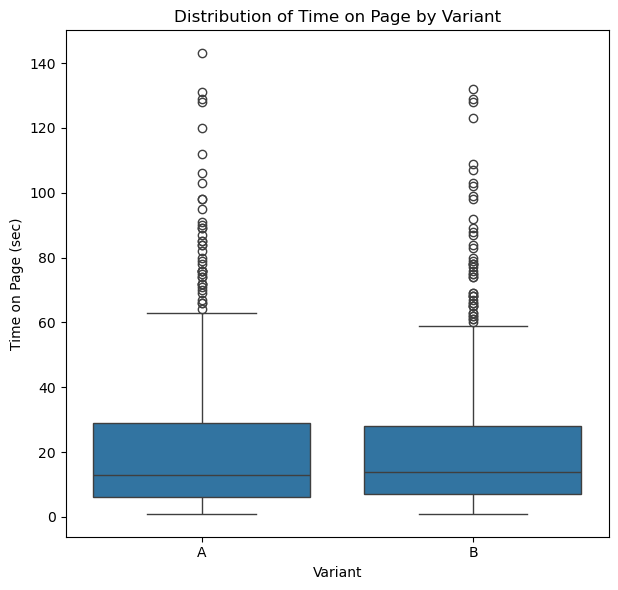

In [16]:
plt.figure(figsize=[18, 6])
# Plotting Average Time on Page
plt.subplot(1, 3, 2)
sns.boxplot(x='Variant', y='Time on Page (sec)', data=df)
plt.title('Distribution of Time on Page by Variant')

plt.tight_layout()
plt.show()

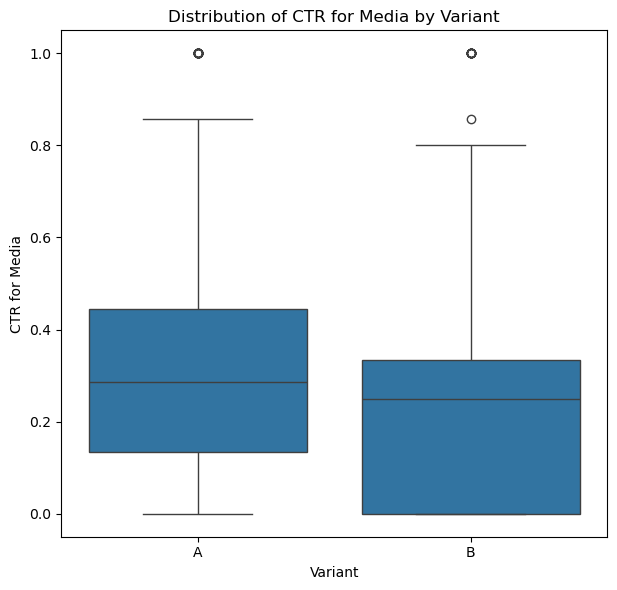

In [17]:
df['CTR for Media'] = df['Clicks on media'] / df['Number of page views']

plt.figure(figsize=[18, 6])
# Plotting CTR for Media
plt.subplot(1, 3, 3)
sns.boxplot(x='Variant', y='CTR for Media', data=df)
plt.title('Distribution of CTR for Media by Variant')

plt.tight_layout()
plt.show()

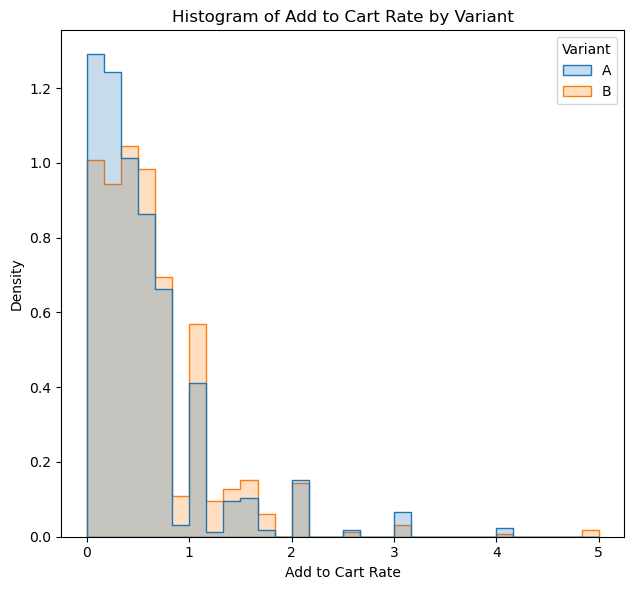

In [18]:
# Histogram for Add to Cart Rate
plt.figure(figsize=[18, 6])
plt.subplot(1, 3, 1)
sns.histplot(df, x='Add to Cart Rate', hue='Variant', element='step', stat='density', common_norm=False, bins=30)
plt.title('Histogram of Add to Cart Rate by Variant')

plt.tight_layout()
plt.show()

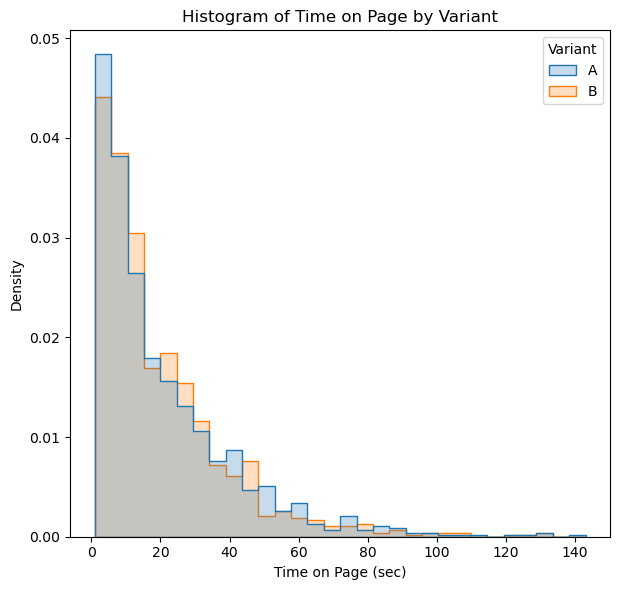

In [19]:
# Histogram for Time on Page
plt.figure(figsize=[18, 6])
plt.subplot(1, 3, 2)
sns.histplot(df, x='Time on Page (sec)', hue='Variant', element='step', stat='density', common_norm=False, bins=30)
plt.title('Histogram of Time on Page by Variant')

plt.tight_layout()
plt.show()

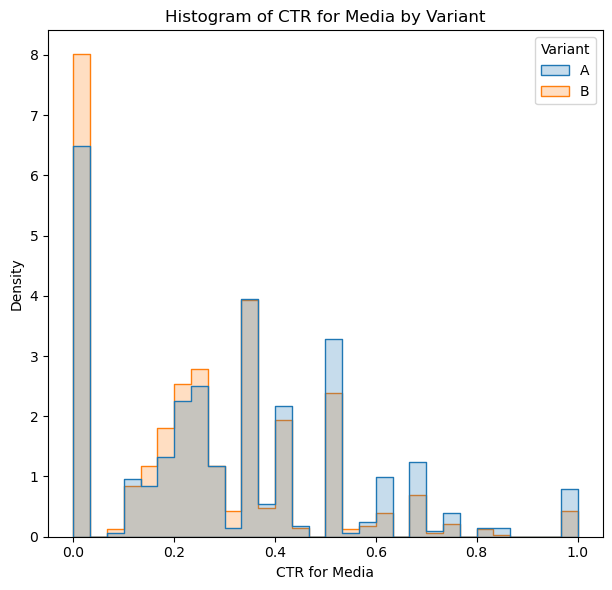

In [20]:
# Histogram for CTR for Media
plt.figure(figsize=[18, 6])
plt.subplot(1, 3, 3)
sns.histplot(df, x='CTR for Media', hue='Variant', element='step', stat='density', common_norm=False, bins=30)
plt.title('Histogram of CTR for Media by Variant')

plt.tight_layout()
plt.show()

## A/B Testing:

Assuming an alph=0.05

testing the primary metric: GMV ($) using t-test

In [21]:
stats.ttest_ind(df[df['Variant']=='A']['GMV (in $)'], df[df['Variant']=='B']['GMV (in $)'], equal_var=False)

Ttest_indResult(statistic=-1.2839539769831623, pvalue=0.19930776178517312)

P_value=0.199 > alpha=0.05, so we cannot reject the null hypothesis and there is no significant difference between the two versions for this metric.

## Testing the secondary metrics:

t-test for Time on page (sec) metric:

In [22]:
stats.ttest_ind(df[df['Variant']=='A']['Time on Page (sec)'], df[df['Variant']=='B']['Time on Page (sec)'], equal_var=False)

Ttest_indResult(statistic=0.5554299489081426, pvalue=0.5786630478332149)

## Z-Test for proportions:

In [25]:
A_click = df[df['Variant']=='A']['Clicks on media'].sum()
A_page_view = df[df['Variant']=='A']['Number of page views'].sum()

B_click = df[df['Variant']=='B']['Clicks on media'].sum()
B_page_view = df[df['Variant']=='B']['Number of page views'].sum()

z_stat, p_value = proportions_ztest([A_click, B_click],[A_page_view, B_page_view])
print(z_stat, p_value )

5.789605314910206 7.055200941129402e-09


In [26]:
A_to_cart = df[df['Variant']=='A']['Number of add to cart'].sum()
A_page_view = df[df['Variant']=='A']['Number of page views'].sum()

B_to_cart = df[df['Variant']=='B']['Number of add to cart'].sum()
B_page_view = df[df['Variant']=='B']['Number of page views'].sum()

z_stat, p_value = proportions_ztest([A_to_cart, B_to_cart],[A_page_view, B_page_view])
print(z_stat, p_value )

-8.874701895488451 7.012097606206308e-19
